Inferential Statistics Mini-Project

In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

Q: Call up the documentation for the norm function imported above. What is the second listed method?

In [2]:
help(norm)

Help on norm_gen in module scipy.stats._continuous_distns object:

class norm_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  norm_gen(momtype=1, a=None, b=None, xtol=1e-14, badvalue=None, name=None, longname=None, shapes=None, extradoc=None, seed=None)
 |  
 |  A normal continuous random variable.
 |  
 |  The location (``loc``) keyword specifies the mean.
 |  The scale (``scale``) keyword specifies the standard deviation.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `norm` is:
 |  
 |  .. math::
 |  
 |      f(x) = \frac{\exp(-x^2/2)}{\sqrt{2\pi}}
 |  
 |  for a real number :math:`x`.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      norm_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, data, **kwds)
 |      Return MLEs for shape (if applicable), location,

Q: Use the method that generates random variates to draw five samples from the standard normal distribution.

In [3]:
seed(47)
# draw five samples here
sample = np.random.normal(size=5)
print(sample)

[-0.84800948  1.30590636  0.92420797  0.6404118  -1.05473698]


Q: What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution.

In [4]:
sample_mean = np.mean(sample)
print(sample_mean)

0.19355593334131074


Q: What is the standard deviation of these numbers?

In [5]:
sample_std = np.sqrt(np.sum((sample_mean-sample)**2)/len(sample))
print(sample_std)

0.9606195639478641


Q: Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

In [6]:
np.std(sample)

0.9606195639478641

In [7]:
# Now we are going to evaluate the corrected standard deviation:
sample_std_corrected = np.sqrt(np.sum((sample_mean-sample)**2)/(len(sample)-1))
print(sample_std_corrected)

1.0740053227518152


We can observe that np.std() finds the standard deviatioon by /(n) method

In [8]:
help(np.std)

Help on function std in module numpy:

std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>)
    Compute the standard deviation along the specified axis.
    
    Returns the standard deviation, a measure of the spread of a distribution,
    of the array elements. The standard deviation is computed for the
    flattened array by default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Calculate the standard deviation of these values.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the standard deviation is computed. The
        default is to compute the standard deviation of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a standard deviation is performed over
        multiple axes, instead of a single axis or all the axes as before.
    dtype : dtype, optional
        Type to use in computing the standard deviation. For arrays of
       

In [9]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

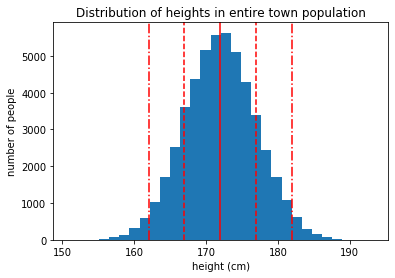

In [10]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

In [11]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

In [12]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

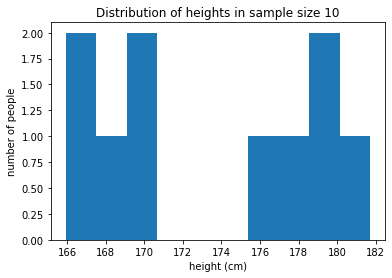

In [13]:
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

The sample distribution doesn't look much like what we know (but wouldn't know in real-life) the population distribution looks like. What do we get for the mean? 

We need to generate a new distribution of means

In [14]:
np.mean(daily_sample1)

173.47911444163503

In [15]:
daily_sample2 = townsfolk_sampler(10)

In [16]:
np.mean(daily_sample2)

173.7317666636263

In [17]:
seed(47)
# take your samples here
sampling_distribution = np.empty(10000)
for i in range(10000):
    daily_sample = townsfolk_sampler(10)
    sampling_distribution[i] = np.mean(daily_sample)

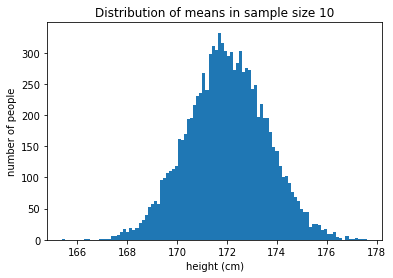

In [18]:
_ = plt.hist(sampling_distribution, bins=100)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of means in sample size 10')

The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be b
, which, in this case, should be approximately 1.58.

In [19]:
print(np.std(sampling_distribution))

1.5897843899823647


This result is very close to the theoretical mean 1.58 which confirms CLTRemember, in this instance, we knew our population parameters, that the average height really is 172 cm and the standard deviation is 5 cm, and we see some of our daily estimates of the population mean were as low as around 168 and some as high as 176.
Remember, in this instance, we knew our population parameters, that the average height really is 172 cm and the standard deviation is 5 cm, and we see some of our daily estimates of the population mean were as low as around 168 and some as high as 176.

Q: Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year!) Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.
Q: Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year!) Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

In [20]:
seed(47)
# take your samples here
sampling_distribution_50 = np.empty(10000)
for i in range(10000):
    daily_sample = townsfolk_sampler(50)
    sampling_distribution_50[i] = np.mean(daily_sample)

In [21]:
np.mean(sampling_distribution_50)

172.01748410569905

In [22]:
np.std(sampling_distribution_50)

0.7108232702269639

The mean looks the means are almost the same but standard deviation got smaller when the sample size is 50

Q: Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

A: 0.84

Fortunately, scipy has this functionality built in with the cdf() function.

Q: Use the cdf() function to answer the question above again and verify you get the same answer.

In [23]:
help(norm.cdf)

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Cumulative distribution function of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    cdf : ndarray
        Cumulative distribution function evaluated at `x`



In [24]:
norm.cdf(1, loc=0, scale=1)

0.8413447460685429

Q: Using our knowledge of the population parameters for our townsfolk's heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

In [25]:
seed(47)
# take your samples here
sampling_distribution_1 = np.empty(10000)
for i in range(10000):
    daily_sample = townsfolk_sampler(1)
    sampling_distribution_1[i] = np.mean(daily_sample)

In [26]:
norm.cdf((177-np.mean(sampling_distribution_1)), loc=0, scale=np.std(sampling_distribution_1))

0.8443853795629004

Q: Turning this question around. Let's say we randomly pick one person and measure their height and find they are 2.00 m tall? How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

In [27]:
1-norm.cdf((200-np.mean(sampling_distribution_1)), loc=0, scale=np.std(sampling_distribution_1))

8.924303962487556e-09

This looks very rare case

Use our favorite random seed of 47, to randomly sample the heights of 50 townsfolk

In [28]:
seed(47)
# take your samples here
sampling_distribution_50 = np.empty(100000)
for i in range(100000):
    daily_sample = townsfolk_sampler(50)
    sampling_distribution_50[i] = np.mean(daily_sample)

Estimate the population mean using np.mean

In [29]:
np.mean(sampling_distribution_50)

172.01885841629175

Estimate the population standard deviation using np.std (remember which denominator to use!)

In [30]:
np.std(sampling_distribution_50)

0.7042229638157813

Calculate the (95%) margin of error (use the exact critial z value to 2 decimal places - look this up or use norm.ppf())


In [31]:
round(norm.ppf(.95),2)

1.64

Calculate the 95% Confidence Interval of the mean

In [32]:
np.percentile(sampling_distribution_50,[2.5,97.5])

array([170.63743626, 173.39798328])

Does this interval include the true population mean?
Yes

Q: Above we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

Since this is a sampling distribution, the standard deviation is expected to be larger

In [33]:
t.ppf(.95,49)

1.6765508919142629

In [34]:
t.interval(0.95, 49)

(-2.009575234489209, 2.009575234489209)

In [35]:
def t_interval(alpha,df, data):
    return (np.mean(data)+np.std(data, ddof=49)*t.interval(alpha,df)[0], np.mean(data)+np.std(data, ddof=49)*t.interval(alpha,df)[1])

In [36]:
t_interval(.95,49, sampling_distribution_50)

(170.60332253986505, 173.43439429271845)

As we can see, this interval is largera

# Part 2

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('C:\\Users\Servet\Desktop\insurance2.csv')

In [38]:
medical.shape

(1338, 8)

In [39]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


Q: Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

Text(0.5, 0, 'charge')

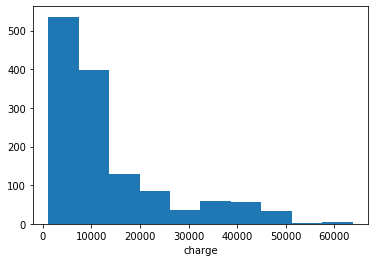

In [40]:
plt.hist(medical['charges'])
plt.xlabel('charge')

Q: The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

In [77]:
#Firstly, we are going to create two new columns to separate the insured and uninsured claims
medical['insured'] = np.where(medical['insuranceclaim'] == 1, medical['charges'], None)
medical['uninsured'] = np.where(medical['insuranceclaim'] == 0, medical['charges'] , None)
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim,insured,uninsured
0,19,0,27.900,0,1,3,16884.92400,1,16884.9,None
1,18,1,33.770,1,0,2,1725.55230,1,1725.55,None
2,28,1,33.000,3,0,2,4449.46200,0,None,4449.46
3,33,1,22.705,0,0,1,21984.47061,0,None,21984.5
4,32,1,28.880,0,0,1,3866.85520,1,3866.86,None


In [71]:
# Now we will replace the missing values with the mean
medical = medical.fillna(medical.mean())
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim,insured,uninsured
0,19,0,27.900,0,1,3,16884.92400,1,16884.924000,8821.421892
1,18,1,33.770,1,0,2,1725.55230,1,1725.552300,8821.421892
2,28,1,33.000,3,0,2,4449.46200,0,16423.928277,4449.462000
3,33,1,22.705,0,0,1,21984.47061,0,16423.928277,21984.470610
4,32,1,28.880,0,0,1,3866.85520,1,3866.855200,8821.421892


In [75]:
# We will import the libraries
from scipy import stats
from scipy.stats import ttest_ind

In [76]:
# Now we will perform two sample t-test two compare the sample means
stats.ttest_ind(medical['insured'], medical['uninsured'], equal_var=False)

Ttest_indResult(statistic=24.148688741025424, pvalue=2.9900648814027235e-111)

This result looks statistically significant

Q: Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above t-test for a sample, but can you see an equivalent one for performing a z-test from a sample? Comment on your answer.

A: We can find the mean difference between the samples and calculate the standard deviation as sqrt((s1^2+s2^2)/n), then calcuate a z-score and a corresponding p-value